# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values # select open column from data

In [3]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timesteps and 1 output

In [6]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
print(X_train)
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [9]:
X_train.shape, y_train.shape

((1198, 60), (1198,))

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
X_train.shape

(1198, 60, 1)

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [17]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [21]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [22]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [23]:
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

### Fitting the RNN to the Training set

In [26]:
X_train.shape, y_train.shape

((1198, 60, 1), (1198,))

In [24]:
regressor.fit(X_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 10s 28ms/step - loss: 0.0389
Epoch 2/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 1s 27ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 1s 29ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 1s 25ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0050
Epoch 12/100
38/38 [==============================] - 1s 26ms/step - loss: 0.0042
Epoch 13/100
38/38 [====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [27]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values # select open column from data

### Getting the predicted stock price of 2017

In [29]:
dataset_test.shape, dataset_train.shape

((20, 6), (1258, 6))

In [31]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 : ].values

In [32]:
inputs.shape

(80,)

In [34]:
inputs = inputs.reshape(-1,1)
inputs.shape # get the right shape

(80, 1)

In [35]:
inputs = sc.transform(inputs)

In [36]:
X_test = []

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [37]:
predicted_stock_price = regressor.predict(X_test)

In [38]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

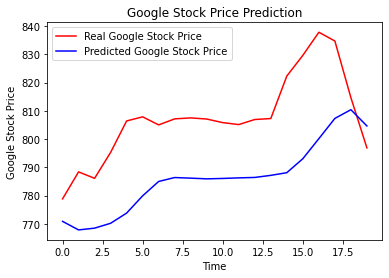

In [39]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()